In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
y_onehot = keras.utils.to_categorical(y, num_classes=3)

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_onehot, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

In [6]:
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (75, 4)
Validation set shape: (30, 4)
Test set shape: (45, 4)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='sigmoid', input_shape=(4,)),
    keras.layers.Dense(3, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=16, verbose=0)

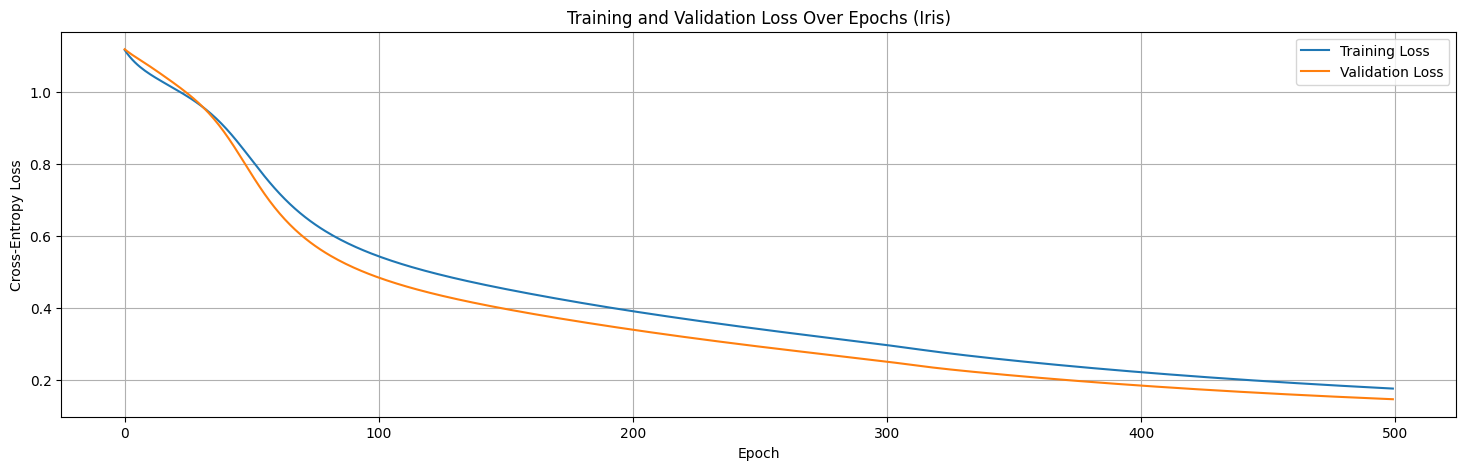

In [16]:
plt.figure(figsize=(18, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training and Validation Loss Over Epochs (Iris)')
plt.legend()
plt.grid(True)
plt.savefig('classification_loss_curve.png')
plt.show()

In [11]:
min_val_loss_epoch = np.argmin(history.history['val_loss']) + 1
min_val_loss = np.min(history.history['val_loss'])
print(f"Best model at epoch {min_val_loss_epoch} with validation loss: {min_val_loss:.6f}")

Best model at epoch 500 with validation loss: 0.146185


In [12]:
y_pred = model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

In [13]:
accuracy = np.mean(y_pred_classes == y_test_classes)
print(f"Accuracy on test set: {accuracy:.6f}")

Accuracy on test set: 1.000000


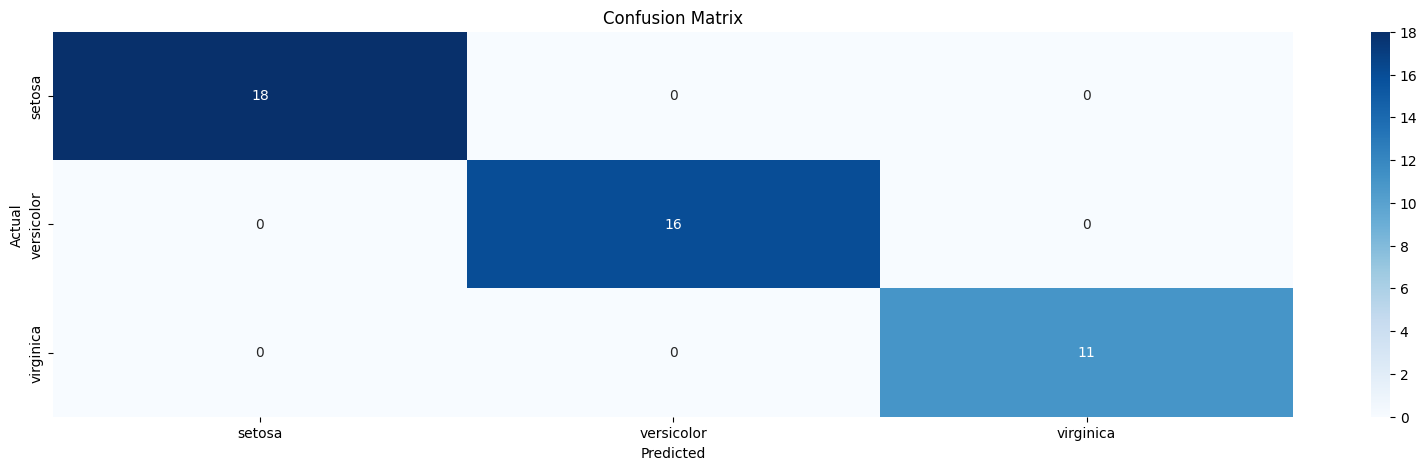

In [20]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(20, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()